## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Link a mi GitHub con el Taller:  https://github.com/louisboza/DS_UC_Diplomado/blob/main/Taller_3/16841206-1.ipynb

## Pregunta 1

* Realice un análisis de componentes principales 
* Seleccione la cantidad de componentes que expliquen al menos el 70% de la variabilidad de los datos.

In [2]:
url1 = 'https://raw.githubusercontent.com/louisboza/DS_UC_Diplomado/main/Taller_3/src/datos%20clustering.csv'
df = pd.read_csv(url1)
df = df.iloc[: , 1:]

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
0,-4.554889,4.100700,-3.134432,-1.313845,-9.391112,2.519540,1.308041,0.926173,7.067234,3.509057,3
1,10.766431,4.114985,-0.145851,6.064239,-4.482858,2.045298,-8.068677,7.231181,-1.361735,-1.031854,2
2,8.697494,6.927252,0.081115,8.782801,-6.016109,2.765242,-9.023664,9.352678,-1.699800,-0.519918,2
3,7.887380,0.888983,0.613888,6.976301,-11.153522,-5.858364,-12.793676,4.969787,1.399372,6.831188,1
4,3.432427,3.062779,0.881139,-0.040477,-4.844429,2.057529,-2.111636,8.952105,10.530478,-2.324382,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-5.638204,5.114135,-2.291695,0.251086,-10.924352,1.057903,-1.287649,0.283605,10.307540,3.024076,3
996,-3.508695,0.723544,7.349984,-9.965556,5.947235,3.773877,-5.598804,-6.681666,-3.295204,-4.446303,4
997,7.674610,1.017102,0.417147,9.468713,-8.446090,3.635614,-7.830873,7.801254,3.202772,-1.398679,2
998,-2.715874,-4.812502,1.952096,-9.379788,2.704248,2.744819,-9.215514,-3.714886,-3.388018,-2.648786,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1000 non-null   float64
 1   V2      1000 non-null   float64
 2   V3      1000 non-null   float64
 3   V4      1000 non-null   float64
 4   V5      1000 non-null   float64
 5   V6      1000 non-null   float64
 6   V7      1000 non-null   float64
 7   V8      1000 non-null   float64
 8   V9      1000 non-null   float64
 9   V10     1000 non-null   float64
 10  y       1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


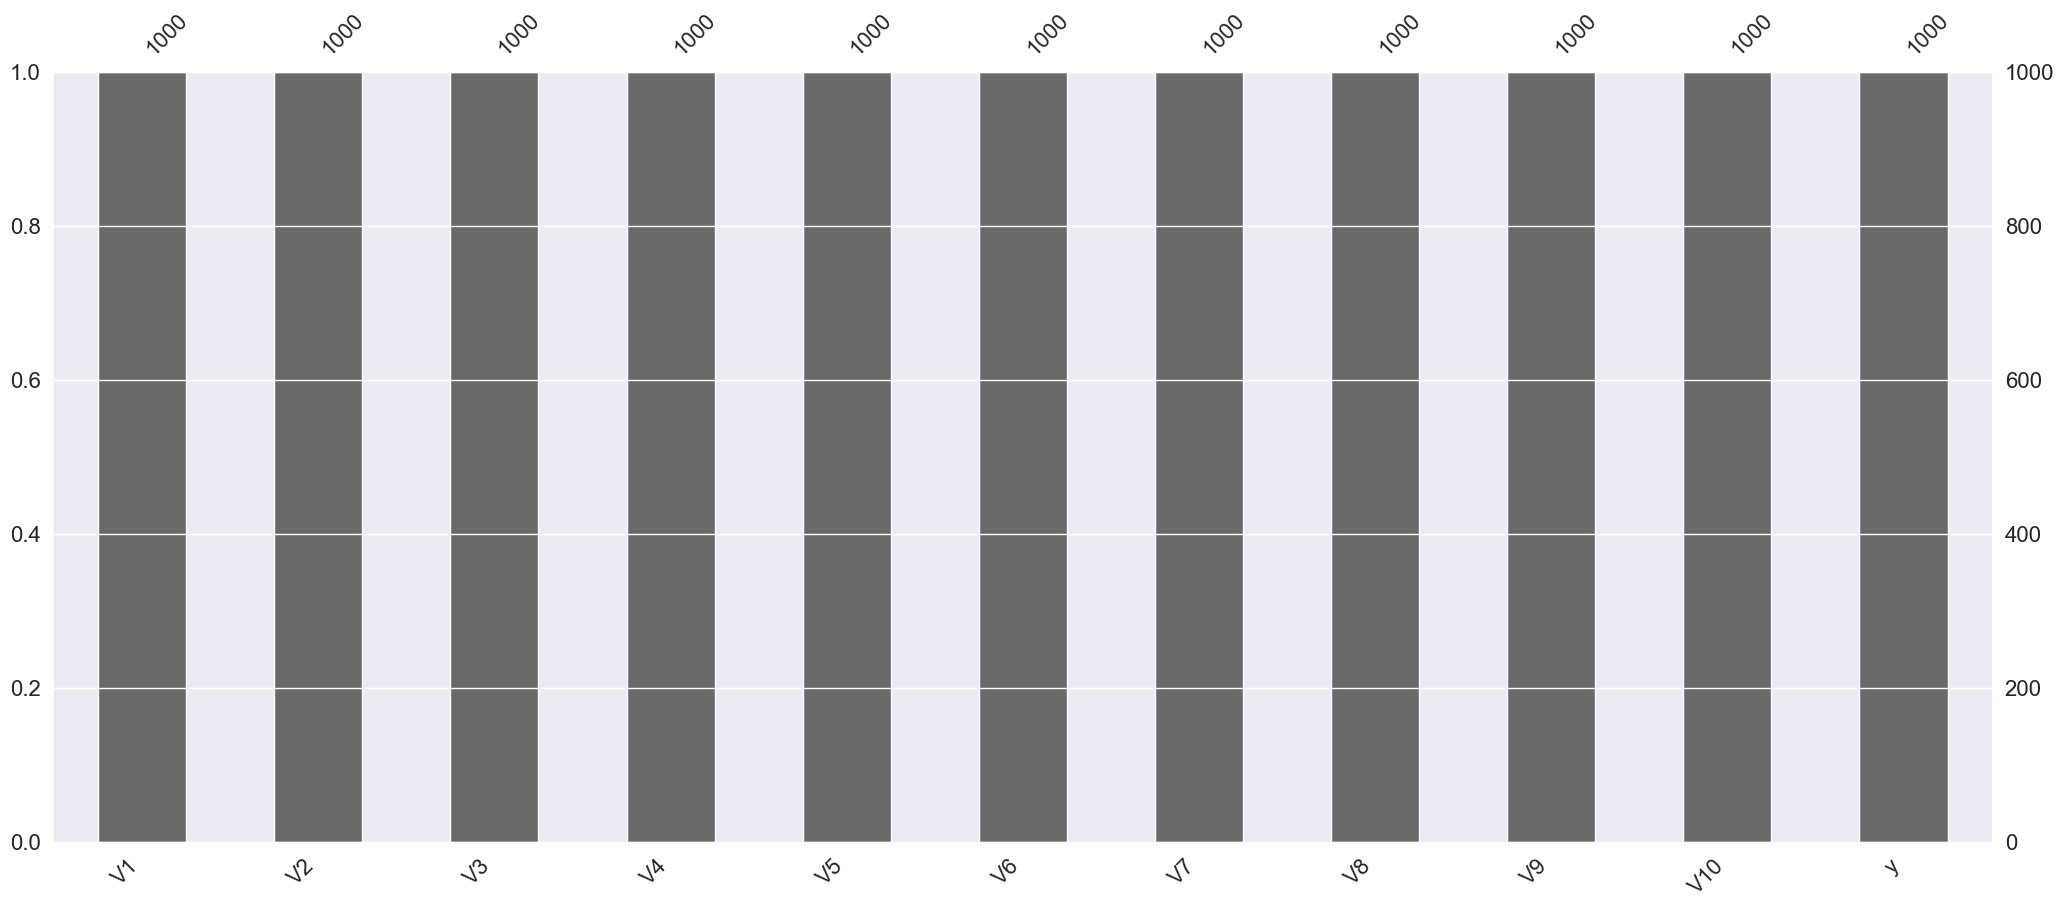

In [5]:
msno.bar(df)
plt.show();

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.710243,2.923479,1.071101,1.438992,-4.830020,0.562688,-4.337602,3.768002,4.059712,0.885110,2.000000
std,5.613573,3.332145,2.553934,6.078318,5.152609,4.775007,4.629891,6.244621,5.271564,4.446010,1.414921
min,-10.336050,-6.163549,-5.578369,-13.910283,-14.587279,-12.406714,-13.670221,-12.363672,-8.231120,-8.157966,0.000000
25%,-3.241236,0.156534,-0.703247,-0.800848,-8.961043,-0.147294,-8.031575,1.336208,-0.522490,-2.666102,1.000000
50%,1.142130,3.350592,1.037109,2.136730,-6.794439,2.192924,-5.275733,6.128501,5.237320,-0.471722,2.000000
75%,6.649163,5.577882,2.749196,6.121880,-0.568679,3.685808,-0.388468,8.344065,8.462400,4.700983,3.000000
max,14.373547,11.248621,8.545396,12.254451,8.068756,7.758332,7.563432,14.257335,14.656287,11.998252,4.000000


Al explorar el dataset a través de la matriz msno no se observar valores nulos, sin embargo, al realizar el descriptivo de cada variable, se observan diferencias significativas en los valores de las varianzas de las variables, por lo cual, es necesario estandarizar los valores para obtener mejores resultados al realizar el PCA.

In [7]:
X = df.drop(['y'], axis = 1).values
y = df['y']

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
            StandardScaler(),
            PCA(random_state = 2023)
)

pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(random_state=2023))])

''

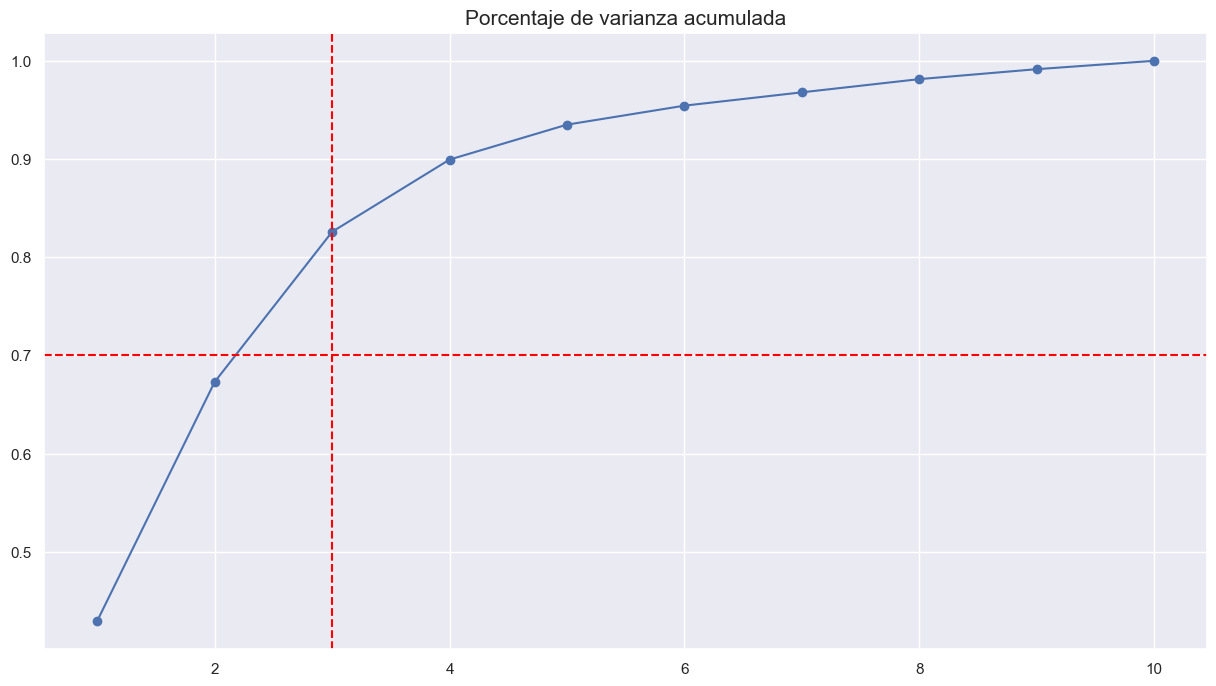

In [9]:
plt.figure(figsize = (15, 8))
plt.plot(
    range(1, len(pipeline.named_steps["pca"].components_) + 1),
    np.cumsum(pipeline.named_steps["pca"].explained_variance_ratio_),
    marker = "o"
)

plt.title(
    "Porcentaje de varianza acumulada",
    size = 15
)

plt.axhline(y = 0.7, 
            linestyle = "--", 
            color = "red"
)

plt.axvline(x = 3, 
            linestyle = "--", 
            color = "red"
)
;

Se observa a través de la varianza acumulada, que con la tercera componente se explica a lo menos el 70% de la variabilidad de los datos.

## Pregunta 2

Detecte el número óptimo de clustering utilizando la información de PCA con la metodología de Elbow y Average silhouette.

In [10]:
X_trans = pipeline.transform(X)

### Elbow Method

nº Cluster:1
nº Cluster:2
nº Cluster:3
nº Cluster:4
nº Cluster:5
nº Cluster:6
nº Cluster:7
nº Cluster:8
nº Cluster:9
nº Cluster:10
nº Cluster:11
nº Cluster:12
nº Cluster:13
nº Cluster:14


Text(0, 0.5, 'Intra-cluster (inertia)')

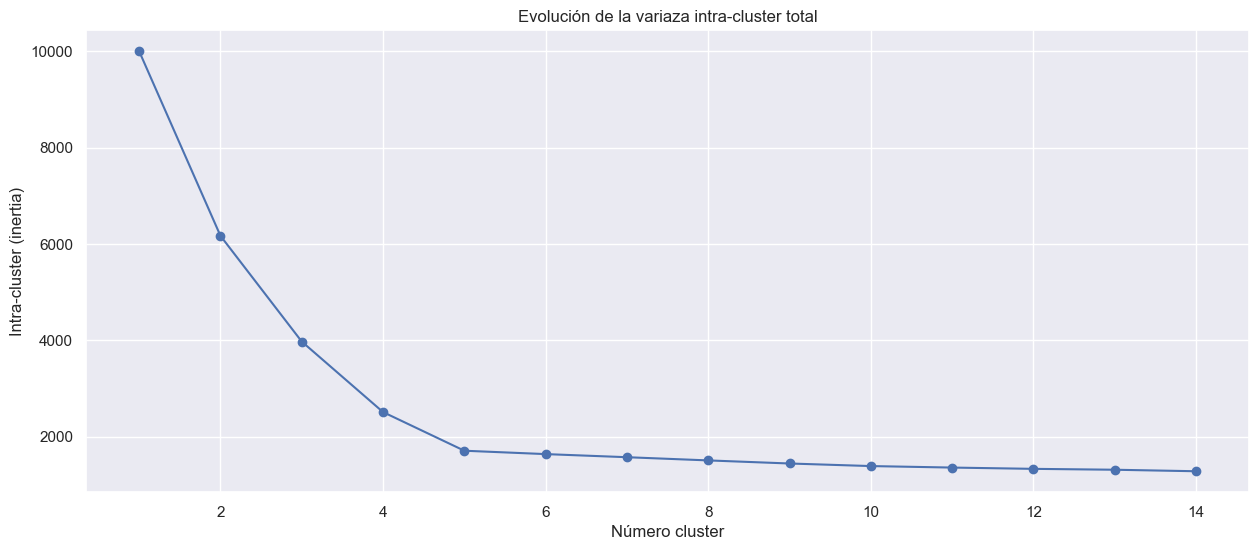

In [11]:
from sklearn.cluster import KMeans

range_n_cluster = range(1, 15)
inertias = []

for n_clusters in range_n_cluster:
    modelo_kmeans = KMeans(n_clusters = n_clusters,
                          n_init = 20,
                          random_state = 2023)
    modelo_kmeans.fit(X_trans)
    inertias.append(modelo_kmeans.inertia_)
    print('nº Cluster:{}'.format(n_clusters))

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
ax.plot(range_n_cluster, inertias, marker = 'o')
ax.set_title('Evolución de la variaza intra-cluster total')
ax.set_xlabel('Número cluster')
ax.set_ylabel('Intra-cluster (inertia)')

Mediante elbow method, se observa que el quiebre se genera entre el quinto y sexto cluster.

### Silhouette Score

nº Cluster:2
nº Cluster:3
nº Cluster:4
nº Cluster:5
nº Cluster:6
nº Cluster:7
nº Cluster:8
nº Cluster:9
nº Cluster:10
nº Cluster:11
nº Cluster:12
nº Cluster:13
nº Cluster:14


Text(0, 0.5, 'Media indices silhouette')

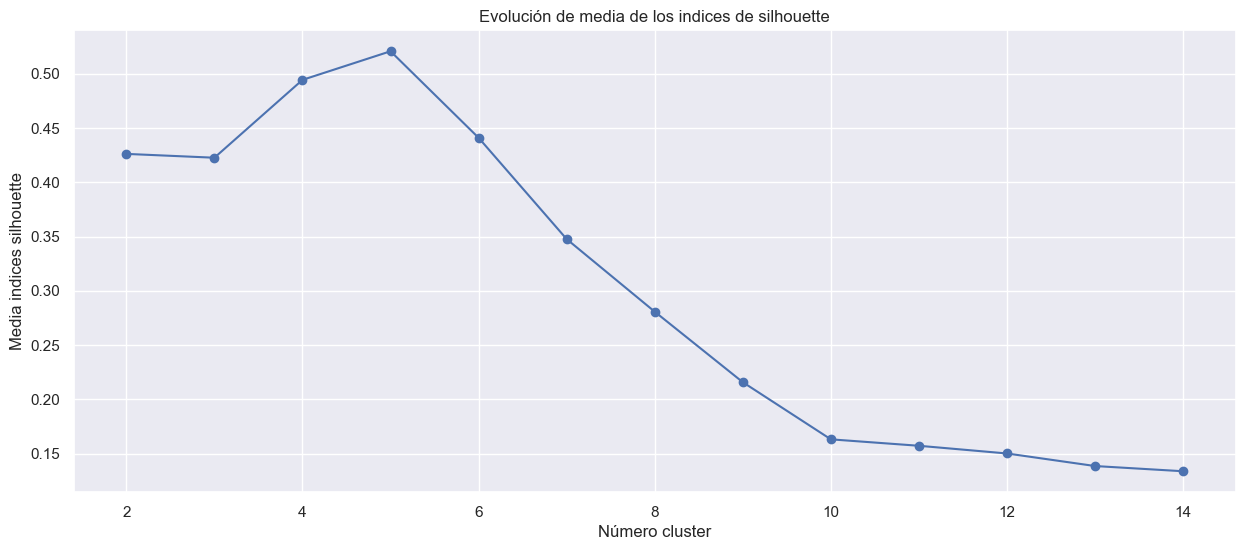

In [12]:
from sklearn.metrics import silhouette_score

range_n_cluster = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_cluster:
    modelo_kmeans = KMeans(n_clusters = n_clusters,
                          n_init = 20,
                          random_state = 2023)
    
    cluster_pred = modelo_kmeans.fit_predict(X_trans)
    #inertias.append(modelo_kmeans.inertia_)
    silhouette_medio = silhouette_score(X_trans, cluster_pred)
    valores_medios_silhouette.append(silhouette_medio)
    print('nº Cluster:{}'.format(n_clusters))

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
ax.plot(range_n_cluster, valores_medios_silhouette, marker = 'o')
ax.set_title('Evolución de media de los indices de silhouette')
ax.set_xlabel('Número cluster')
ax.set_ylabel('Media indices silhouette')

Mediante el Silhouetta Score, se observa que la cantidad de cluster óptimos son 5.

Se concluye que el número óptimo de cluster a trabajar, dado ambos métodos, es 5.

## Pregunta 3

* Ajuste un clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados. 
* Qué puede concluir al respecto?

In [13]:
dg = pd.DataFrame(X_trans)
dg = dg.iloc[: , :2]
dg.rename(columns = {0: "Component_1", 1: "Component_2"}, inplace = True)
dg

,Component_1,Component_2
0,-0.428936,1.894558
1,-0.763021,-0.876434
2,-1.288818,-0.522318
3,-1.920118,-2.572587
4,-0.353050,0.975881
...,...,...
995,-0.786520,1.773956
996,4.463171,-0.754302
997,-1.063485,-0.680340
998,3.458908,-1.606568


In [14]:
modelo = KMeans(random_state = 2023, n_clusters = 5)
modelo.fit(dg)

KMeans(n_clusters=5, random_state=2023)

In [15]:
dg['labels'] = modelo.labels_

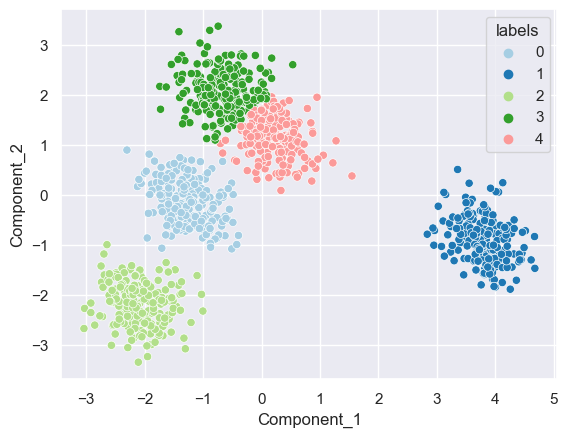

In [16]:
sns.scatterplot(data = dg, x = "Component_1", y = "Component_2", hue = "labels", palette = "Paired");

A tavés de la representación de los clusters, se observa que estos se encuentran bien representados. 

Éxiste bastante proximidad entre los clusters 3 y 4, pese a las limitancias del hard assignment de kmeans, se observa que estos se encuentran bien delimitados. Sin embargo, dada esta misma naturaleza y la forma de asignación de las observaciones a cada cluster, puntos como los existentes entre el cluster 0 y 4 podrian tener mayor probabilidad de pertenecer a uno u otro, la cual no queda recogida acá.

Pese a lo anterior, los clusters en cuestión se ven robustos y consistentes.

